In [1]:
import torch
import torchvision as torchv
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch import Tensor
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np



c:\Users\47472\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import sys
from pathlib import Path
module_path = str(Path.cwd().parents[0].parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

import lossFunctions

CROSS ENTROPY LOSS

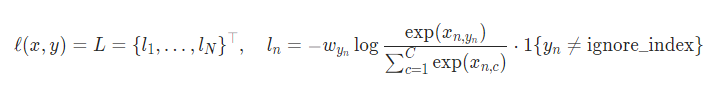

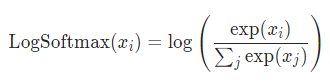

In [3]:
def zeroOneLoss(outputs, labels):
    return [1 if x[y] > 0 else 0 for x,y in zip(outputs ,labels)]

In [4]:
xList = torch.randn(3, 2, requires_grad=True)
yList = torch.empty(3, dtype=torch.long).random_(2)

print(xList)
print(yList)
print([1 if x[y] > 0 else 0 for x,y in zip(xList ,yList)])
print(yList == 1)

tensor([[-1.9079,  1.3821],
        [ 0.1759, -0.7360],
        [-0.9320, -1.4977]], requires_grad=True)
tensor([1, 0, 0])
[1, 1, 0]
tensor([ True, False, False])


In [5]:
y_true = torch.randn(10, 2, requires_grad=True)
print(y_true)
print(torch.max(y_true, dim=1)[1])

tensor([[-0.9474,  0.5119],
        [-0.6854, -0.5067],
        [-0.1914, -0.9868],
        [-1.2591,  1.3702],
        [ 1.9832, -0.2396],
        [ 1.4241, -1.7069],
        [ 0.2628,  1.2172],
        [-1.9005,  0.3610],
        [ 1.3093,  0.2966],
        [ 0.4007, -0.2946]], requires_grad=True)
tensor([1, 1, 0, 1, 0, 0, 1, 1, 0, 0])


In [6]:
classes = 2
numberOfInput = 10

input = torch.randn(numberOfInput, classes, requires_grad=True)
target = torch.empty(numberOfInput, dtype=torch.long).random_(classes)


print('input: ', input)
print('target: ', target)

print("==========")
cross_entropy_loss = nn.CrossEntropyLoss()
customloss = lossFunctions.CustomLoss(5)
test = nn.MultiMarginLoss()

output = cross_entropy_loss(input, target)
output2 = customloss(input, target)
output4 = test(input, target)

output.backward()
output2.backward()
output4.backward()


print('output standard: ', output)
print('output customloss: ', output2)
print('output multimargin: ', output4)

input:  tensor([[ 0.7509, -0.6681],
        [-1.8045,  0.7481],
        [ 0.5217,  0.1435],
        [-0.1785, -0.3598],
        [-0.2069,  0.1040],
        [-0.1060, -0.6204],
        [ 0.9761, -0.8523],
        [-0.0402, -1.0619],
        [-0.8847,  0.6994],
        [ 1.5686, -0.6017]], requires_grad=True)
target:  tensor([1, 0, 1, 1, 1, 0, 0, 1, 0, 0])
output standard:  tensor(1.0327, grad_fn=<NllLossBackward0>)
output customloss:  tensor(0.9808, grad_fn=<DivBackward0>)
output multimargin:  tensor(0.7156, grad_fn=<MultiMarginLossBackward0>)


In [281]:
input = torch.FloatTensor([[100.0, 0.0]])
target = torch.LongTensor([0])
input.requires_grad_()
exp = torch.exp(input)
print("=======", torch.sum(exp, 1, keepdim=True))
print(exp/torch.sum(exp, 1, keepdim=True))
print("=======",torch.log(exp/torch.sum(exp, 1, keepdim=True)))

print('input: ', input)
print('target: ', target)
output = customloss(input, target)
output.backward()
print('output standard: ', output)

======= tensor([[inf]], grad_fn=<SumBackward1>)
tensor([[nan, 0.]], grad_fn=<DivBackward0>)
======= tensor([[nan, -inf]], grad_fn=<LogBackward0>)
input:  tensor([[100.,   0.]], requires_grad=True)
target:  tensor([0])
output standard:  tensor(0.0780, grad_fn=<DivBackward0>)


In [286]:
x = torch.linspace(1,10,10)
y = torch.zeros(10)
print(x, "===", y)
print(torch.stack((x,y),1))

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]) === tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([[ 1.,  0.],
        [ 2.,  0.],
        [ 3.,  0.],
        [ 4.,  0.],
        [ 5.,  0.],
        [ 6.,  0.],
        [ 7.,  0.],
        [ 8.,  0.],
        [ 9.,  0.],
        [10.,  0.]])


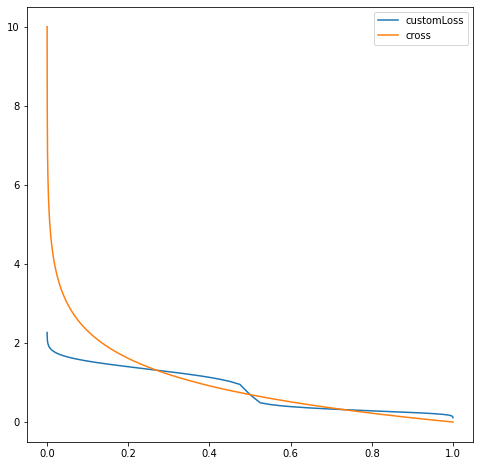

In [415]:
loss1 = lossFunctions.CustomLoss(3)
loss2 = nn.CrossEntropyLoss()
m = nn.Sigmoid()

result1 = []
result2 = []
rnge =  np.arange(-10,10,0.1)
for i in rnge:
    result1.append(loss1(torch.FloatTensor([[i, 0]]), torch.LongTensor([0])))
    result2.append(loss2(torch.FloatTensor([[i, 0]]), torch.LongTensor([0])))
plt.figure(figsize=(8,8))
plt.plot(m(torch.tensor(rnge)), result1, label="customLoss")
plt.plot(m(torch.tensor(rnge)), result2, label="cross")
# print(list(m((torch.tensor(rnge)))))
plt.legend()
plt.show()

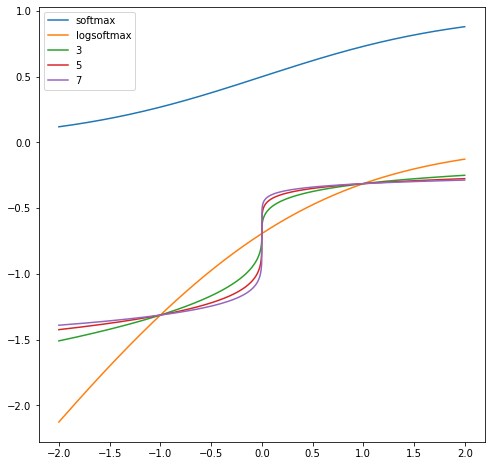

In [484]:
n = nn.Softmax(dim=1)
m = nn.LogSoftmax(dim=1)
result0 = []
result1 = []
result2 = []
result3 = []
result4 = []
rnge =  np.arange(-2,2,0.001)
for i in rnge:
    result0.append(n(torch.FloatTensor([[i, 0]]))[0].data[0])
    result1.append(m(torch.FloatTensor([[i, 0]]))[0].data[0])
    result2.append(lossFunctions.logSoftmax(torch.FloatTensor([[i, 0]]), 3)[0].data[0])
    result3.append(lossFunctions.logSoftmax(torch.FloatTensor([[i, 0]]), 5)[0].data[0])
    result4.append(lossFunctions.logSoftmax(torch.FloatTensor([[i, 0]]), 7)[0].data[0])
    
plt.figure(figsize=(8,8))
plt.plot(rnge, result0, label="softmax")
plt.plot(rnge, result1, label="logsoftmax")
plt.plot(rnge, result2, label="3")
plt.plot(rnge, result3, label="5")
plt.plot(rnge, result4, label="7")
# plt.ylim(-4, 1)
# plt.xlim(-1, 1)
plt.legend()
plt.show()